In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import csv
import random as rdm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut

In [ ]:
def treinaELM(neuronios,X,Y):
  Xin=np.ones((X.shape[0],X.shape[1]+1))
  Xin[:,1:]=X
  n=Xin.shape[1]
  Z=np.array([rdm.uniform(-0.5,0.5)for i in range(n*neuronios)]).reshape(n,neuronios)
  H=np.tanh(np.dot(Xin,Z))
  Haux=np.ones((H.shape[0],H.shape[1]+1))
  Haux[:,1:]=H
  w=np.dot(np.linalg.pinv(Haux),Y)
  return w,H,Z

def YELM(X,Z,w):
  Xin=np.ones((X.shape[0],X.shape[1]+1))
  Xin[:,1:]=X
  H=np.tanh(np.dot(Xin,Z))
  Haux=np.ones((H.shape[0],H.shape[1]+1))
  Haux[:,1:]=H
  Yhat=np.sign(np.dot(Haux,w))
  return Yhat


In [ ]:
data=pd.read_csv('drive/MyDrive/nbadata.csv', sep=",", header=None)
data.columns=data.iloc[0]
data=data.iloc[1:,:]
X=data.loc[:,data.columns!='TARGET_5Yrs'].to_numpy()
Y=data['TARGET_5Yrs'].to_numpy()

In [ ]:
Y[np.where(Y=='1')] = 1
Y[np.where(Y=='0')] = -1
X = X.astype(np.float)

<ipython-input-5-c1293b843381>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float)


In [ ]:
X = X.astype(np.float)
Y = Y.astype(np.float)

<ipython-input-6-6a1baede2c3f>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float)
<ipython-input-6-6a1baede2c3f>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y = Y.astype(np.float)


In [ ]:
Y[np.where(Y==0)]=-1

In [ ]:
Y

array([-1., -1., -1., ..., -1.,  1.,  1.])

In [ ]:
Y=np.array(Y.tolist())
varaux=0
acuraciateste=np.zeros((9,10))
acuracian=np.zeros(9)
for p in [100000]:
  trainacuraciaELM=np.zeros(10)
  testacuraciaELM=np.zeros(10)
  for i in range(0,10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
    scaler=StandardScaler()
    Xtrain=scaler.fit_transform(Xtrain)
    Xtest=scaler.transform(Xtest)

    w, H, Z = treinaELM(p,Xtrain, Ytrain)
    Yhattrain=YELM(Xtrain,Z,w)
    Yhat=YELM(Xtest,Z,w)
    trainacuraciaELM[i] = accuracy_score(Ytrain, Yhattrain)
    testacuraciaELM[i] = accuracy_score(Ytest, Yhat)
    acuraciateste[varaux,i]=accuracy_score(Ytest, Yhat)
  acuracian[varaux]=testacuraciaELM.mean()
  varaux=varaux+1
  print(f"ELM p={p}")
  #print("Acuracia treino: " + '{:.4f}'.format(trainacuraciaELM.mean())+ "+/-" + '{:.4f}'.format(trainacuraciaELM.std()))
  print("Acuracia test: " + '{:.4f}'.format(testacuraciaELM.mean()) + "+/-" + '{:.4f}'.format(testacuraciaELM.std()))



ELM p=100000
Acuracia test: 0.5689+/-0.0218


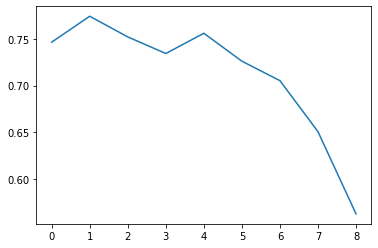

In [ ]:
plt.plot(acuracian)

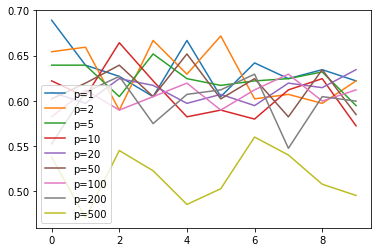

In [ ]:
plt.plot(acuraciateste[0], label="p=1")
plt.plot(acuraciateste[1], label="p=2")
plt.plot(acuraciateste[2], label="p=5")
plt.plot(acuraciateste[3], label="p=10")
plt.plot(acuraciateste[4], label="p=20")
plt.plot(acuraciateste[5], label="p=50")
plt.plot(acuraciateste[6], label="p=100")
plt.plot(acuraciateste[7], label="p=200")
plt.plot(acuraciateste[8], label="p=500")
plt.legend()
plt.show()

In [ ]:
def diagmatrix(lin,col,num):
  return np.diag(np.diag(np.ones((lin,col))*num))

In [ ]:
def bestLOO(H,y,p):
  lseq = np.linspace(0,1,11)
  nl=lseq.shape[0]
  mobjs=np.zeros((nl,2))
  mw=np.zeros((nl,p))
  dimw=H.shape[0]+1
  cl=-1
  Alist=np.zeros((lseq.shape[0],p,p))
  Plist=np.zeros((lseq.shape[0],H.shape[0],H.shape[0]))
  LOOLambda=np.zeros((nl,1))
  GCVLambda=np.zeros((nl,1))
  for i in lseq:
    cl=cl+1
    w=np.linalg.inv(H.T.dot(H)+diagmatrix(p,p,i)).dot(H.T).dot(y)
    Alist[cl]=(H.T.dot(H)+diagmatrix(p,p,i))
    matsave=H.dot(np.linalg.inv(Alist[cl]).dot(H.T))
    Plist[cl]=diagmatrix(H.shape[0],H.shape[0],1)-matsave
    LOOLambda[cl]=((y.T.dot(Plist[cl]).dot(np.linalg.inv(np.diag(np.diag(Plist[cl]))).T).dot(np.linalg.inv(np.diag(np.diag(Plist[cl])))).dot(Plist[cl]).dot(y))/H.shape[0])
    GCVLambda[cl]=((y.T.dot(Plist[cl].dot(Plist[cl])).dot(y))/(sum(np.diag(Plist[cl])))**2)
    mobjs[cl,1]=sum(H.dot(w)-y)**2
    mobjs[cl,0]=w.T.dot(w)
    mw[cl,:]=w
  cl=-1
  emw=np.zeros(nl)
  for i in range(0,nl):
    cl=cl+1
    w=mw[i]
    yhatr=H.dot(w)
    emw[cl]=sum((yhatr-y)**2)
  if p==600:
    minemw=min(emw)
    bestsol=np.where(emw==minemw)
  else:
    minemw=min(LOOLambda)
    bestsol=np.where(LOOLambda==minemw)
  return (mw[bestsol[0][0]])

def YELMloo(X,Z,w):
  Xin=np.ones((X.shape[0],X.shape[1]+1))
  Xin[:,1:]=X
  H=np.tanh(np.dot(Xin,Z))
  Yhat=np.sign(np.dot(H,w))
  return Yhat

In [ ]:
Y=np.array(Y.tolist())
cont=0
mediaLOO=np.zeros(9)
lootestacuracia=np.zeros(9)
lootrainacuracia=np.zeros(9)
for p in [15, 20, 50, 75, 100, 150, 200, 300, 600]:
  acuracialootest=np.zeros(10)
  acuracialootrain=np.zeros(10)
  for i in range(0,10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
    scaler=StandardScaler()
    Xtrain=scaler.fit_transform(Xtrain)
    Xtest=scaler.transform(Xtest)

    w, H, Z = treinaELM(p,Xtrain, Ytrain)
    w = bestLOO(H,Ytrain,p)
    Yhattrain=YELMloo(Xtrain,Z,w)
    Yhat=YELMloo(Xtest,Z,w)
    acuracialootest[i]=accuracy_score(Ytest, Yhat)
    acuracialootrain[i]=accuracy_score(Ytrain, Yhattrain)
  lootrainacuracia[cont] = acuracialootrain.mean()
  lootestacuracia[cont] = acuracialootest.mean()
  print(f"ELM p={p}")
  print("Acuracia test: " + '{:.4f}'.format(lootestacuracia[cont])+ "+/-" + '{:.4f}'.format(acuracialootest.std()))
  cont=cont+1

ELM p=15
Acuracia test: 0.9450+/-0.0196
ELM p=20
Acuracia test: 0.9480+/-0.0227
ELM p=50
Acuracia test: 0.9509+/-0.0131
ELM p=75
Acuracia test: 0.9579+/-0.0167
ELM p=100
Acuracia test: 0.9637+/-0.0107
ELM p=150
Acuracia test: 0.9585+/-0.0103
ELM p=200
Acuracia test: 0.9556+/-0.0166
ELM p=300
Acuracia test: 0.9655+/-0.0172
ELM p=600
Acuracia test: 0.9170+/-0.0179


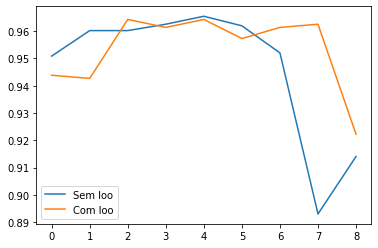

In [ ]:
plt.plot(acuracian, label="Sem loo")
plt.plot(lootestacuracia, label="Com loo")
plt.legend()
plt.show()

In [ ]:
def pruningELM(neuronios,X,Y,vetaux):
  Xin=np.ones((X.shape[0],X.shape[1]+1))
  Xin[:,1:]=X
  n=Xin.shape[1]
  Z=np.array([rdm.uniform(-0.5,0.5)for j in range(n*neuronios)]).reshape(n,neuronios)
  for k in vetaux:
    Z=np.delete(Z,k,1)
  H=np.tanh(np.dot(Xin,Z))
  Haux=np.ones((H.shape[0],H.shape[1]+1))
  Haux[:,1:]=H
  w=np.dot(np.linalg.pinv(Haux),Y)
  return w,H,Z


In [ ]:
Y=np.array(Y.tolist())
varaux=0
acuraciatestep=np.zeros((9,10))
acuracianp=np.zeros(9)
for p in [15, 20, 50, 75, 100, 150, 200, 300, 600]:
  trainacuraciaELM=np.zeros(10)
  testacuraciaELM=np.zeros(10)
  vetaux=[]
  for k in range(0,p):
    num=p-k-1
    vetaux.append(num)
    for i in range(0,10):
      Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
      scaler=StandardScaler()
      Xtrain=scaler.fit_transform(Xtrain)
      Xtest=scaler.transform(Xtest)

      w, H, Z = treinaELM(p,Xtrain, Ytrain)
      Zaux=np.delete(Z,num,1)
      waux=np.delete(w,num,0)
      Yhattrain=YELM(Xtrain,Zaux,waux)
      Yhat=YELM(Xtest,Zaux,waux)
      trainacuraciaELM[i] = accuracy_score(Ytrain, Yhattrain)
      testacuraciaELM[i] = accuracy_score(Ytest, Yhat)
      acuraciatestep[varaux,i]=accuracy_score(Ytest, Yhat)
    acuracianp[varaux]=testacuraciaELM.mean()
    if acuracianp[varaux]<acuracian[varaux]:
      vetaux.remove(num)
  for k in vetaux:
    Z=np.delete(Z,k,1)
    w=np.delete(w,k,0)

  for i in range(0,10):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3)
    scaler=StandardScaler()
    Xtrain=scaler.fit_transform(Xtrain)
    Xtest=scaler.transform(Xtest)

    Yhattrain=YELM(Xtrain,Zaux,waux)
    Yhat=YELM(Xtest,Zaux,waux)
    trainacuraciaELM[i] = accuracy_score(Ytrain, Yhattrain)
    testacuraciaELM[i] = accuracy_score(Ytest, Yhat)
    acuraciatestep[varaux,i]=accuracy_score(Ytest, Yhat)
    acuracianp[varaux]=testacuraciaELM.mean()

  nremove=len(vetaux)
  varaux=varaux+1
  print(f"ELM p={p}")
  print("Acuracia test: " + '{:.4f}'.format(testacuraciaELM.mean())
  + "+/-" + '{:.4f}'.format(testacuraciaELM.std()))

ELM p=15
Acuracia test: 0.9345+/-0.0186
ELM p=20
Acuracia test: 0.9421+/-0.0149
ELM p=50
Acuracia test: 0.9719+/-0.0159
ELM p=75
Acuracia test: 0.9749+/-0.0079
ELM p=100
Acuracia test: 0.9643+/-0.0092
ELM p=150
Acuracia test: 0.9889+/-0.0080
ELM p=200
Acuracia test: 0.9836+/-0.0063
ELM p=300
Acuracia test: 0.9626+/-0.0120
ELM p=600
Acuracia test: 0.9749+/-0.0098


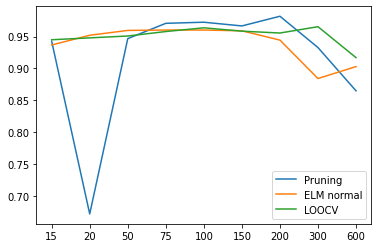

In [ ]:
vetx=['15', '20', '50', '75', '100', '150', '200', '300', '600']
plt.plot(vetx, acuracianp, label="Pruning")
plt.plot(acuracian, label="ELM normal")
plt.plot(lootestacuracia, label="LOOCV")
plt.legend()
plt.show()